<a href="https://colab.research.google.com/github/ZynTran/Fuzzy_Logic/blob/main/Grab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 6.3 MB/s eta 0:00:00


Cost: 500.0000000000001
Point: 6.88888888888889


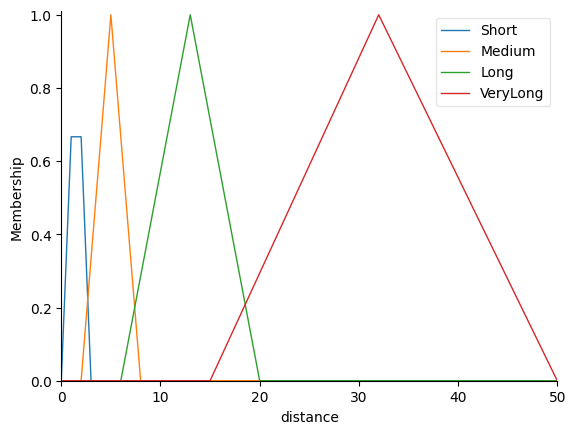

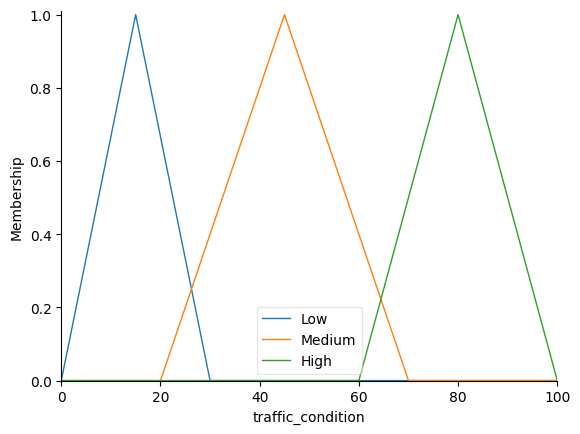

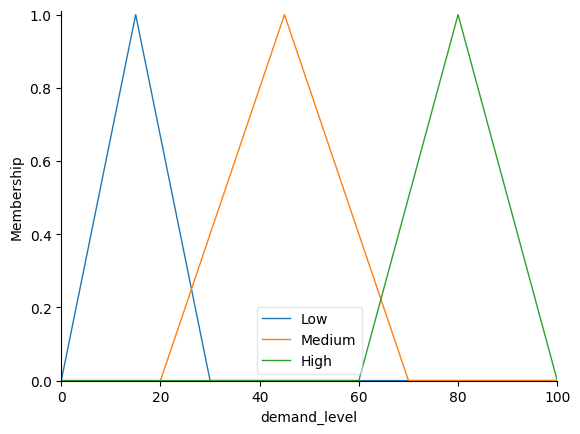

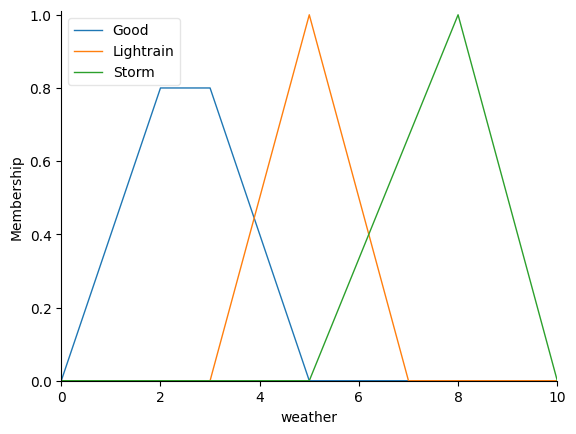

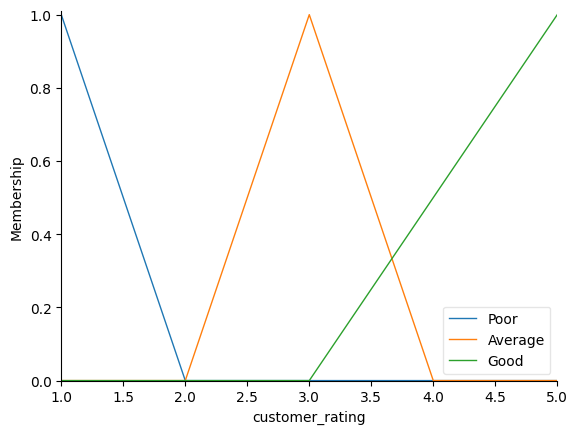

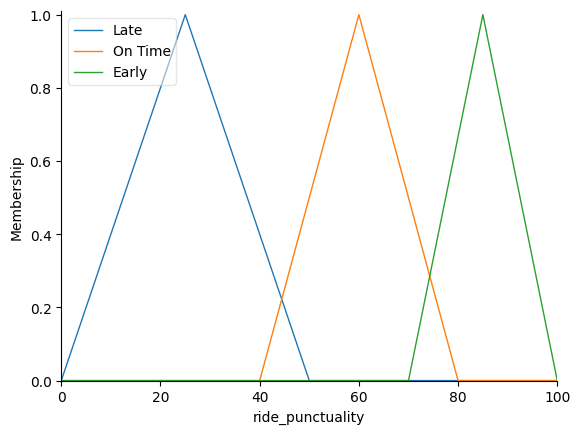

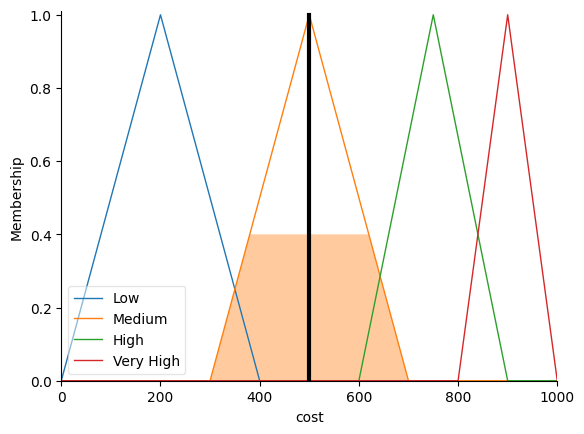

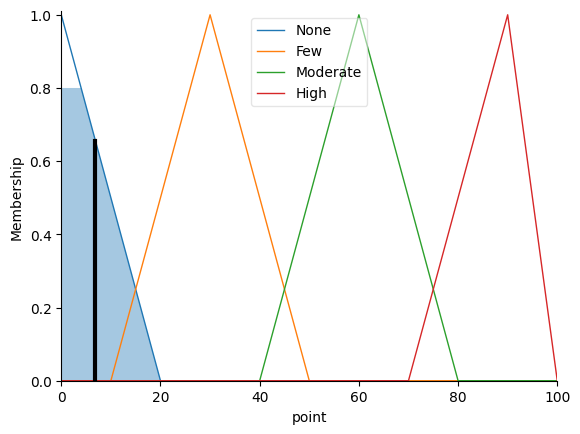

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
distance=ctrl.Antecedent(np.arange(0,51,1),'distance')
traffic_condition=ctrl.Antecedent(np.arange(0,101,1),'traffic_condition')
demand_level=ctrl.Antecedent(np.arange(0,101,1),'demand_level')
weather=ctrl.Antecedent(np.arange(0,11,1),'weather')
customer_rating=ctrl.Antecedent(np.arange(1,6,1),'customer_rating')
ride_punctuality=ctrl.Antecedent(np.arange(0,101,1),'ride_punctuality')

cost=ctrl.Consequent(np.arange(0, 1001, 10),'cost')
point=ctrl.Consequent(np.arange(0, 101, 1),'point')

distance['Short'] = fuzz.trimf(distance.universe, [0, 1.5, 3])      # 0-3 km
distance['Medium'] = fuzz.trimf(distance.universe, [2, 5, 8])      # 2-8 km
distance['Long'] = fuzz.trimf(distance.universe, [6, 13, 20])      # 6-20 km
distance['VeryLong'] = fuzz.trimf(distance.universe, [15, 32, 50]) # 15-50 km

traffic_condition['Low']=fuzz.trimf(traffic_condition.universe,[0, 15, 30])
traffic_condition['Medium']=fuzz.trimf(traffic_condition.universe,[20,45,70])
traffic_condition['High']=fuzz.trimf(traffic_condition.universe,[60,80,100])

demand_level['Low']=fuzz.trimf(demand_level.universe,[0,15,30])
demand_level['Medium']=fuzz.trimf(demand_level.universe,[20,45,70])
demand_level['High']=fuzz.trimf(demand_level.universe,[60,80,100])

weather['Good']=fuzz.trimf(weather.universe,[0,2.5,5])
weather['Lightrain']=fuzz.trimf(weather.universe,[3,5,7])
weather['Storm']=fuzz.trimf(weather.universe,[5,8,10])

customer_rating['Poor']=fuzz.trimf(customer_rating.universe,[1,1,2])
customer_rating['Average']=fuzz.trimf(customer_rating.universe,[2,3,4])
customer_rating['Good']=fuzz.trimf(customer_rating.universe,[3,5,5])

ride_punctuality['Late']=fuzz.trimf(ride_punctuality.universe,[0,25,50])
ride_punctuality['On Time']=fuzz.trimf(ride_punctuality.universe,[40,60,80])
ride_punctuality['Early']=fuzz.trimf(ride_punctuality.universe,[70,85,100])

cost['Low']=fuzz.trimf(cost.universe,[0,200,400])
cost['Medium']=fuzz.trimf(cost.universe,[300, 500, 700])
cost['High']=fuzz.trimf(cost.universe,[600, 750, 900])
cost['Very High']=fuzz.trimf(cost.universe,[800, 900, 1000])

point['None']=fuzz.trimf(point.universe,[0, 0, 20])
point['Few']=fuzz.trimf(point.universe,[10, 30, 50])
point['Moderate']=fuzz.trimf(point.universe,[40, 60, 80])
point['High']=fuzz.trimf(point.universe,[70, 90, 100])

distance.view()
traffic_condition.view()
demand_level.view()
weather.view()
customer_rating.view()
ride_punctuality.view()

rule1=ctrl.Rule(distance['Short']& traffic_condition['Low'] & demand_level['Low'], cost['Low'])
rule2=ctrl.Rule(distance['Short']& traffic_condition['Medium'] & demand_level['High'], cost['Medium'])
rule3=ctrl.Rule(distance['Medium']& traffic_condition['High'] & demand_level['High'], cost['High'])
rule4=ctrl.Rule(distance['Long']& traffic_condition['Medium'] & weather['Good'], cost['Medium'])
rule5=ctrl.Rule(distance['Long']& traffic_condition['High'] & weather['Storm'], cost['Very High'])
rule6=ctrl.Rule(distance['VeryLong'] & traffic_condition['High'] & demand_level['High'], cost['Very High'])
rule7=ctrl.Rule(distance['Medium'] & traffic_condition['Low'] & demand_level['Low'], cost['Medium'])
rule8=ctrl.Rule(distance['Short'] & traffic_condition['High'] & weather['Storm'], cost['High'])
rule9=ctrl.Rule(distance['VeryLong'] & weather['Storm'], cost['High'])
rule10=ctrl.Rule(distance['Medium'] & traffic_condition['Medium'] & weather['Lightrain'], cost['Medium'])
rule11=ctrl.Rule(customer_rating['Good'] & ride_punctuality['Early'], point['High'])
rule12=ctrl.Rule(customer_rating['Average'] & ride_punctuality['On Time'], point['Moderate'])
rule13=ctrl.Rule(customer_rating['Poor'] & ride_punctuality['Late'], point['None'])
rule14=ctrl.Rule(distance['Long'] & traffic_condition['High'] & ride_punctuality['On Time'], point['High'])
rule15=ctrl.Rule(distance['Medium'] & traffic_condition['Medium'] & customer_rating['Good'], point['Moderate'])
rule16=ctrl.Rule(customer_rating['Poor'] & ride_punctuality['Late'], point['None'])
rule17=ctrl.Rule(distance['VeryLong'] & weather['Storm'] & customer_rating['Good'], point['High'])
rule18=ctrl.Rule(distance['Short'] & customer_rating['Average'] & ride_punctuality['On Time'], point['Few'])
rule19=ctrl.Rule(distance['Long']& traffic_condition['High'] & ride_punctuality['Late'], point['Few'])
rule20=ctrl.Rule(distance['Medium'] & weather['Lightrain'] & customer_rating['Good'], point['Moderate'])

bai1_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,])
control = ctrl.ControlSystemSimulation(bai1_system)

control.input['distance'] = 13
control.input['traffic_condition'] = 30
control.input['demand_level']=70
control.input['weather'] = 3
control.input['customer_rating'] = 1
control.input['ride_punctuality'] = 20

control.compute()

print("Cost:", control.output['cost'])
print("Point:", control.output['point'])

cost.view(sim=control)
point.view(sim=control)